In [129]:
import numpy as np
import time
from IPython.display import clear_output

In [130]:
testinput = [
"p=0,4 v=3,-3",
"p=6,3 v=-1,-3",
"p=10,3 v=-1,2",
"p=2,0 v=2,-1",
"p=0,0 v=1,3",
"p=3,0 v=-2,-2",
"p=7,6 v=-1,-3",
"p=3,0 v=-1,-2",
"p=9,3 v=2,3",
"p=7,3 v=-1,2",
"p=2,4 v=2,-3",
"p=9,5 v=-3,-3",
]

def convertinput(ipt):
    out = []
    for i in ipt:
        out.append([int(j) for j in i.replace("p=","").replace(" v=",",").split(",")])
    return out


In [131]:
convertinput(testinput)

[[0, 4, 3, -3],
 [6, 3, -1, -3],
 [10, 3, -1, 2],
 [2, 0, 2, -1],
 [0, 0, 1, 3],
 [3, 0, -2, -2],
 [7, 6, -1, -3],
 [3, 0, -1, -2],
 [9, 3, 2, 3],
 [7, 3, -1, 2],
 [2, 4, 2, -3],
 [9, 5, -3, -3]]

In [132]:
def evolveRobot(i, t, fx=11, fh=7):
    i[0]=(i[0]+t*i[2])%fx
    i[1]=(i[1]+t*i[3])%fh 
    return i

def evolveInput(ipt, t, fx=11, fh=7):
    for i in range(len(ipt)):
        evolveRobot(ipt[i], t, fx, fh)
    return ipt

def countPerQuadrant(ipt, fx=11, fh=7):
    ul, ur, bl, br = 0, 0, 0, 0
    for i in ipt:
        if i[0] == int(fx/2) or i[1] == int(fh/2): continue
        if i[0]< fx/2:
            if i[1]<fh/2:ul+=1
            else: bl+=1
        else:
            if i[1]<fh/2:ur+=1
            else: br+=1
    print(ul, ur,bl, br)
    return ul*ur*bl*br

In [133]:
countPerQuadrant(evolveInput(convertinput(testinput), 100))

1 3 4 1


12

In [134]:
ipt = [l.strip("\n") for l in open("input.txt") ]

In [135]:
countPerQuadrant(evolveInput(convertinput(ipt), 100, 101, 103), 101, 103)

118 128 110 133


220971520

In [136]:
def vizualize(ipt, fx, fh, thr=None):
    m = np.zeros([fh,fx])
    for i in ipt:
        x, y, vx, vy = i
        m[y][x] +=1
    maxcont = 0
    for y in range(fh):
        cont = 0
        for x in range(fx):
            if m[y][x]>0: cont+=1
            else:
                if cont > maxcont: maxcont=cont
                cont=0
        if cont > maxcont: maxcont=cont
    if thr:
        if maxcont>thr:
            return True
        return False
    plt.pcolor(m)

In [137]:
longruns = []
for i in range(7000):
    out= vizualize(evolveInput(convertinput(ipt), i, 101, 103), 101, 103, thr=5)
    if out: longruns.append(i)
print(longruns)

[175, 191, 381, 2235, 3471, 4398, 5634, 5951, 6355]


6355


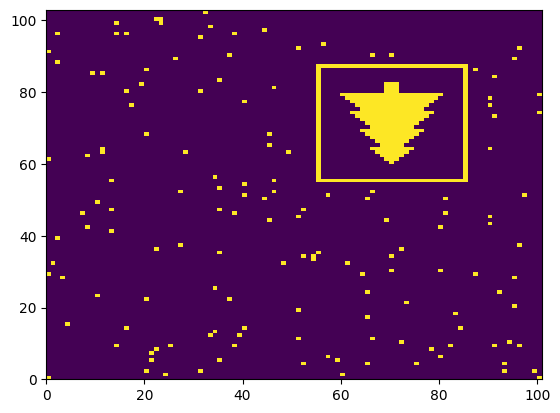

In [138]:
for i in longruns:
    clear_output(wait=True)
    print(i)
    vizualize(evolveInput(convertinput(ipt), i, 101, 103), 101, 103, thr=None)
    plt.show()
    time.sleep(1)

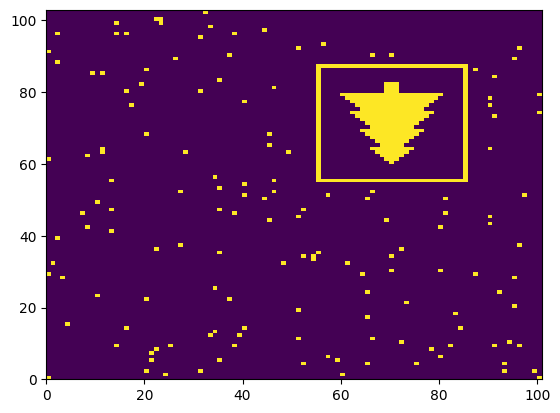

In [139]:
 vizualize(evolveInput(convertinput(ipt), 6355, 101, 103), 101, 103)